# Problemset 3
Solves Problemset 3 in Python
## Ecercise 1:

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

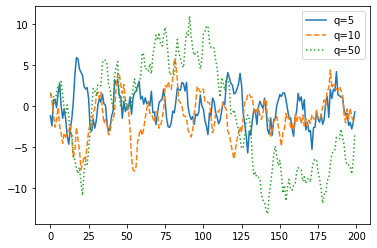

In [2]:
def generate_moving_average(q: int, num=200):
    """Generates MA(q) process for num observations"""
    epsilon = np.random.normal(0, 1, num+q)
    return [sum(epsilon[i:i+q]) for i in range(num)]

# Plot different q's
T = 200
Q = [5, 10, 50]
xs = range(T)
vis = ['-', '--', ':', '-.']
for i, q in enumerate(Q):
    plt.plot(xs, generate_moving_average(q, T),vis[i], label=f'q={q}')
plt.legend()
plt.show()

# Exercise 2:

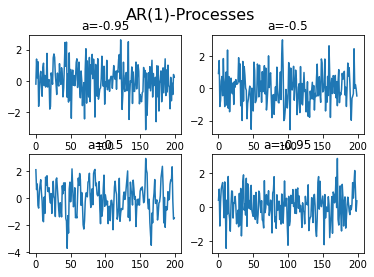

In [3]:
def gen_ar_1(a: float, num_t:int, tolerance: float)->list:
    """Generates AR(1)-process"""
    a_vect = []
    i = 0
    while(a**i > tolerance):
        a_vect.append(a**i)
        i += 1
    epsilon = np.random.normal(0, 1, len(a_vect)+num_t)
    x = [sum(epsilon[i:len(a_vect)+i] * a_vect) for i in range(num_t)]
    return x

t_list = range(200)
a_list = [-0.95, -0.5, 0.5, -0.95]
x_list = [gen_ar_1(a, 200, 0) for a in a_list]

fig = plt.figure()
fig.suptitle("AR(1)-Processes", fontsize=16)
for i, a in enumerate(a_list):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(t_list, x_list[i])
    ax.title.set_text(f'a={a}')
plt.show()


## Exercise 3:

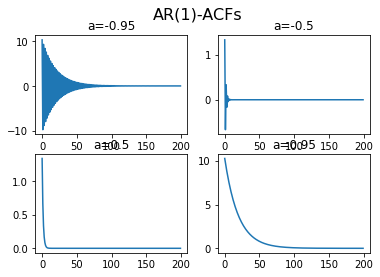

In [4]:
def acf_ar1(a:int, h:int or list or range, sigma:float=1)->float or list:
    """Returns acf for AR(1) process given h and parameter a"""
    gamma = lambda lag: a**abs(lag) * sigma**2 / (1-a**2)
    if isinstance(h, list) or isinstance(h, range):
        return [gamma(lag) for lag in h]
    elif isinstance(h, int):
        return gamma(h)
    else:
        raise "Only integers, lists or ranges allowed for h!"

# Sets parameters
a_list = [-0.95, -0.5, 0.5, 0.95]
t_list = range(200)
acf_list = [acf_ar1(a, t_list) for a in a_list]


fig = plt.figure()
fig.suptitle("AR(1)-ACFs", fontsize=16)
for i, a in enumerate(a_list):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(t_list, acf_list[i])
    ax.title.set_text(f'a={a}')
plt.show()


## Exercise 4:

In [5]:
# # Bad idea:
# def calc_arma11_c_recursive(a:float, b:float, j:int,
#                     current_c:tuple=None)->float or list:
#     """Calculates c_j of ARMA(1,1) process. 
#     If no j is given return list of all |c|>tolerance"""
#     # Having fun with causality/inverability
#     assert abs(a) < 1, "Process should be causal!"
#     assert abs(b) < 1, "Process should be invertible!"
#     # Defining edge-case
#     if j == (0 or 1):
#         return 1 if j==0 else a+b
#     # Using pythons rescursion (unfortunately not too pretty)
#     if not current_c:
#         current_c = a+b, 1
#     c, i = current_c
#     # If current index is target index return c
#     if i == j:
#         return c
#     # Else keep iterating
#     else:
#         c *= a
#         i += 1
#         return calc_arma11_c_recursive(a, b, j, (c, i))
#
## How to kill kernel with recursion ...
## [calc_arma11_c_recursive(-0.75, 0.5, i) for i in range(100)]
#
    # c_list = [1, a+b]
    # while c_list[-1]>0:
    #     c = [c_list[-1] * a]
    #     c_list = c_list + c


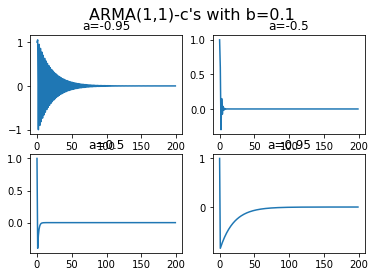

In [6]:
def calc_arma11_c(a:int, b:int, j:int, show_prev:bool=True)->float or list:
    """returns c_j or a list of all c's until c_j"""
    c0 = 1
    c_list = [c0]
    # Building recursion with while loop:
    i, c_i, = 1, b-a
    while i<=j:
        c_list.append(c_i)
        i += 1
        c_i *= a
    # Return list of c's or single value c_j
    if show_prev:
        return c_list
    else:
        return c_list[j]

# Sets parameters
a_list = [-0.95, -0.5, 0.5, 0.95]
b = 0.1
t_len = 200
t_list = range(t_len)
c_list = [calc_arma11_c(a, b, j=t_len-1) for a in a_list]


fig = plt.figure()
fig.suptitle(f'ARMA(1,1)-c\'s with b={b}', fontsize=16)
for i, a in enumerate(a_list):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(t_list, c_list[i])
    ax.title.set_text(f'a={a}')
plt.show()

## Exercise 5

In [7]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

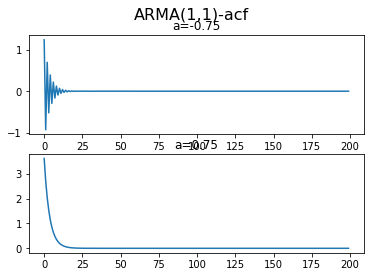

In [8]:
# Define acf:
def acf_arma11(h, a, b, sigma):
    return sigma**2 * a**(h-1) * (b + a + (b+a)**2 * a / (1-a**2))

# Provide settings:
# list((a, b, sigma), (...))
a_list = [(-0.75), (0.75)]
h_len = 200
h_list = range(h_len)
acf_list = [[acf_arma11(h, a, 0.25, 1) 
            for h in h_list]
            for a in a_list]

# Plot result:
fig = plt.figure()
fig.suptitle(f'ARMA(1,1)-acf', fontsize=16)
for i, a in enumerate(a_list):
    ax = fig.add_subplot(2,1,i+1)
    ax.plot(h_list, acf_list[i])
    ax.title.set_text(f'a={a}')
plt.show()
